## Moving averages

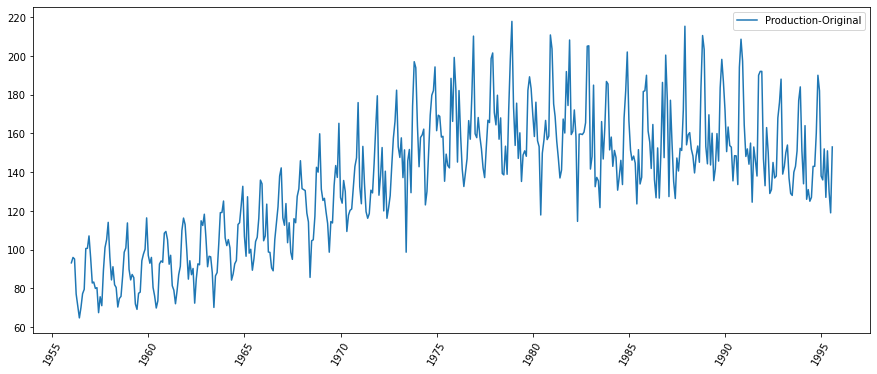

In [1]:
# import needful libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset
data = pd.read_csv('beer_production.csv')
data.columns= ['date','data']
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

# Setting figure size
plt.figure(figsize=(15,6))
# Plot original sales data
plt.plot(data, label="Production-Original")
# Rotate xlabels
plt.xticks(rotation=60)
# Add legends
plt.legend()
#display the plot
plt.show()

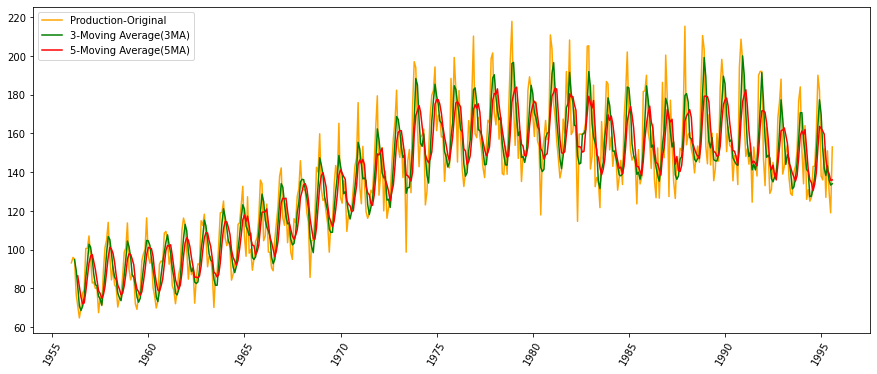

In [2]:
# Moving average with window 3
data['3MA']=data['data'].rolling(window=3).mean()
# Moving average with window 5
data['5MA']=data['data'].rolling(window=5).mean()
# Setting figure size
plt.figure(figsize=(15,6))
# Plot original sales data
plt.plot(data.index, data['data'], label="Production-Original", color="orange")
# Plot 3-Moving Average of sales data
plt.plot(data.index, data['3MA'], label="3-Moving Average(3MA)", color="green")
# Plot 5-Moving Average of sales data
plt.plot(data.index, data['5MA'], label="5-Moving Average(5MA)", color="red")
# Rotate xlabels
plt.xticks(rotation=60)
# Add legends
plt.legend()
#display the plot
plt.show()

## Window Function

In [3]:
# import needful libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset
sales_data = pd.read_csv('sales.csv', index_col ="Time")

# Show initial 5 records
sales_data.head()

,Sales
Time,
01/01/17,271.5
01/02/17,151.4
01/03/17,188.6
01/04/17,124.8
01/05/17,185.8


<AxesSubplot:xlabel='Time'>

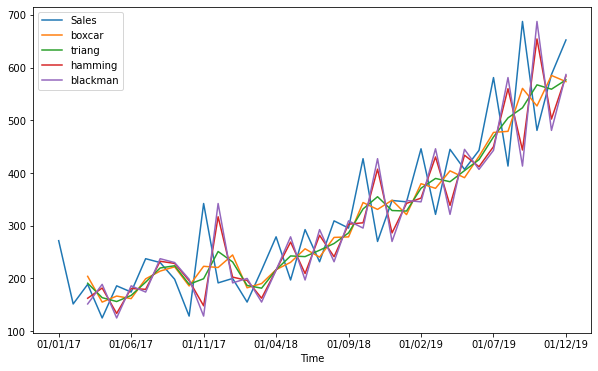

In [4]:
# Apply all the windows on given DataFrame 
sales_data['boxcar']=sales_data.Sales.rolling(3, win_type ='boxcar').mean()
sales_data['triang']=sales_data.Sales.rolling(3, win_type ='triang').mean()
sales_data['hamming']=sales_data.Sales.rolling(3, win_type ='hamming').mean()
sales_data['blackman']=sales_data.Sales.rolling(3, win_type ='blackman').mean()
#Plot the rolling mean of all the windows
sales_data.plot(kind='line',figsize=(10,6))

## Defining cointegration

In [5]:
# import needful libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset
sales_data = pd.read_csv('sales.csv', index_col ="Time")

In [6]:
from statsmodels.tsa.stattools import adfuller

def check_stationary(Series):
    result = adfuller(Series)
    if result[1] >=0.05:
        return "non-stationary"
    else:
        return "stationary"

In [7]:
# import needful libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the dataset
data = pd.read_csv('beer_production.csv')
data.columns= ['date','data']
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

check_stationary(data.data)

'non-stationary'

In [9]:
#https://www.kaggle.com/shenba/time-series-datasets

## Decomposing time series

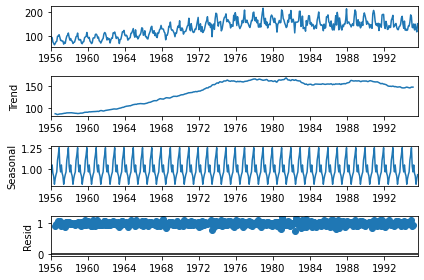

In [10]:
# import needful libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the dataset
data = pd.read_csv('beer_production.csv')
data.columns= ['date','data']
# Change dtatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

# Decompose the data
decomposed_data = seasonal_decompose(data, model='multiplicative')
# Plot decomposed data
decomposed_data.plot()
# Display the plot
plt.show()

## Autocorrelation

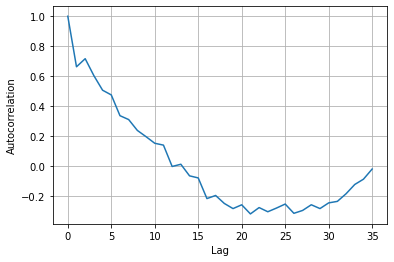

In [11]:
# import needful libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset
data = pd.read_csv('sales.csv')
data.columns= ['date','data']
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

# Calculate autocorrelation using numpy
dy = data.data - np.mean(data.data)
dy_square = np.sum(dy ** 2)

# Cross-correlation
sun_correlated = np.correlate(dy, dy, mode='full')/dy_square
result = sun_correlated[int(len(sun_correlated)/2):]

# Diplay the Chart
plt.plot(result)
# Display grid
plt.grid(True)
# Add labels
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
# Display the chart
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

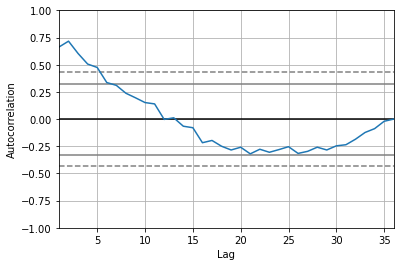

In [12]:
from pandas.plotting import autocorrelation_plot
# Plot using pandas function
autocorrelation_plot(data.data)

## Auto Regression

In [13]:
# import needful libraries
from statsmodels.tsa.ar_model import AR
from pandas import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt

# Read dataset
data = pd.read_csv('sales.csv')
data.columns= ['date','data']
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')


# Split data into train and test set 
train_ratio=0.8
train=data[:int(train_ratio*len(data))]
test=data[int(train_ratio*len(data)):]


# AutoRegression Model training 
ar_model = AR(train.data)
ar_model = ar_model.fit()

# print lags and 
print("Number of Lags:", ar_model.k_ar)
print("Model Coefficients:\n", ar_model.params)

<ipython-input-13-913a7c177780>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Number of Lags: 9
Model Coefficients:
 const      3.387614
L1.data   -0.219978
L2.data    0.261886
L3.data    0.229315
L4.data    0.758578
L5.data    0.377529
L6.data    0.133204
L7.data   -0.045283
L8.data   -0.227360
L9.data   -0.181756
dtype: float64


M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
M:\

In [14]:
# make predictions
start_point = len(train)
end_point = start_point + len(test)-1
pred = ar_model.predict(start=start_point, end=end_point, dynamic=False)
pred.index=test.index

# Calculate erros
mae = mean_absolute_error(test.data, pred)
mse = mean_squared_error(test.data, pred)
rmse = sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("EMSE:",rmse)

MAE: 98.2100936803407
MSE: 15223.346320348704
EMSE: 123.38292556244849


M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [15]:
pred

date
2019-01-05    378.410496
2019-01-06    462.213022
2019-01-07    406.175110
2019-01-08    496.227598
2019-01-09    442.491750
2019-01-10    503.204950
2019-01-11    481.128025
2019-01-12    545.459441
dtype: float64

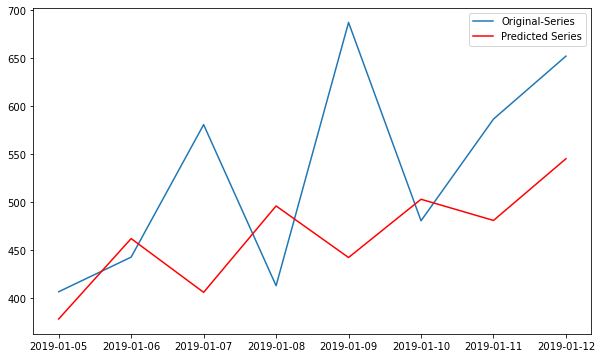

In [16]:
# Setting figure size
plt.figure(figsize=(10,6))
# Plot test data
plt.plot(test, label='Original-Series')
# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')
# Add legends
plt.legend()
# Display the plot
plt.show()

## ARMA

M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

MAE: 133.7666178991423
MSE: 29483.299567048703
EMSE: 171.7070166505979


M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


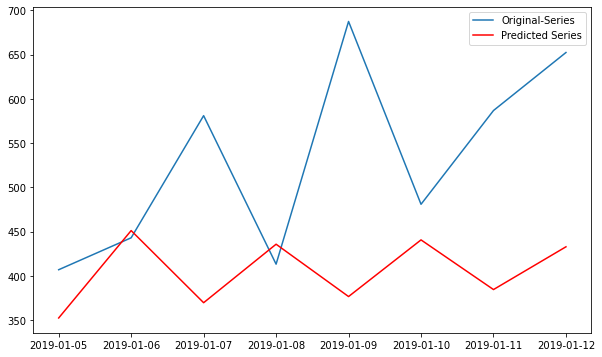

In [17]:
# import needful libraries
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Read dataset
data = pd.read_csv('sales.csv')
data.columns= ['date','data']
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

# Split data into train and test set 
train_ratio=0.8
train=data[:int(train_ratio*len(data))]
test=data[int(train_ratio*len(data)):]

# AutoRegression Model training 
arma_model = ARMA(train, order=(7,0))
arma_model = arma_model.fit()

# make predictions
start_point = len(train)
end_point = start_point + len(test)-1
pred = arma_model.predict(start_point,end_point)
pred.index=test.index

# Calculate erros
mae = mean_absolute_error(test.data, pred)
mse = mean_squared_error(test.data, pred)
rmse = sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("EMSE:",rmse)


# Setting figure size
plt.figure(figsize=(10,6))
# Plot test data
plt.plot(test, label='Original-Series')
# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')
# Add legends
plt.legend()
# Display the plot
plt.show()

## ARIMA

M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

MAE: 143.35221039219027
MSE: 33391.74982240402
EMSE: 182.73409594928916


M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
M:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


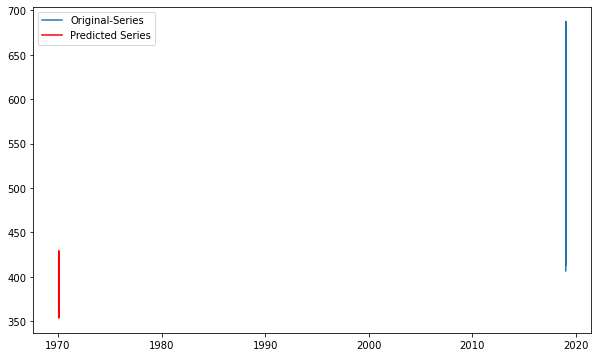

In [18]:
# import needful libraries
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Read dataset
data = pd.read_csv('sales.csv')
data.columns= ['date','data']
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

# Split data into train and test set 
train_ratio=0.8
train=data[:int(train_ratio*len(data))]
test=data[int(train_ratio*len(data)):]

# AutoRegression Model training 
arima_model = ARIMA(train, order=(5,0,0))
arima_model = arima_model.fit()

# make predictions
start_point = len(train)
end_point = start_point + len(test)-1
pred = arima_model.predict(start_point,end_point)

# Calculate erros
mae = mean_absolute_error(test.data, pred)
mse = mean_squared_error(test.data, pred)
rmse = sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("EMSE:",rmse)

# Setting figure size
plt.figure(figsize=(10,6))
# Plot test data
plt.plot(test.data, label='Original-Series')
# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')
# Add legends
plt.legend()
# Display the plot
plt.show()

## Generating Periodic Signals

Params [ 47.18800335  28.89947427   0.56827284   6.51168781   4.55215008
   0.29372074 -14.30920341 -18.16523992   0.06574835  -4.37789699]
Root mean square error 59.561930255687216
Mean absolute error 44.581468315714496
Mean absolute percentage error 65.16404904506578
Symmetric Mean absolute percentage error 78.44776724314043
Coefficient of determination -0.36352579271706853


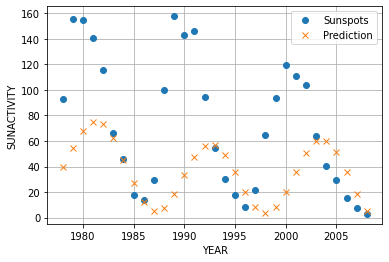

In [19]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
def model(p, t):
   C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = p
   return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + 
phi2) +p3 * np.sin(f3 * t + phi3)
 
def error(p, y, t):
   return y - model(p, t)
 
def fit(y, t):
   p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * 
np.pi/100, 0]
   params = leastsq(error, p0, args=(y, t))[0]
   return params
 
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values
 
cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params", params)
 
pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 
2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 
2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()


## Fourier Analysis

Index of max sine FFT [160 157 166 158 154]
Indices of max sunspots FFT [205 212 215 209 154]


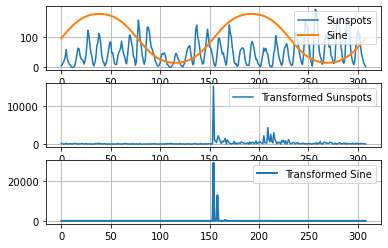

In [20]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift
 
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
 
t = np.linspace(-2 * np.pi, 2 * np.pi, len(sunspots))
mid = np.ptp(sunspots)/2
sine = mid + mid * np.sin(np.sin(t))
 
sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])
 
transformed = np.abs(fftshift(rfft(sunspots)))
print("Indices of max sunspots FFT", np.argsort(transformed)[-5:])
 
plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.plot(sine, lw=2, label="Sine")
plt.grid(True)
plt.legend()
plt.subplot(312)
plt.plot(transformed, label="Transformed Sunspots")
plt.grid(True)
plt.legend()
plt.subplot(313)
plt.plot(sine_fft, lw=2, label="Transformed Sine")
plt.grid(True)
plt.legend()
plt.show()


## Spectral Analysis Filtering

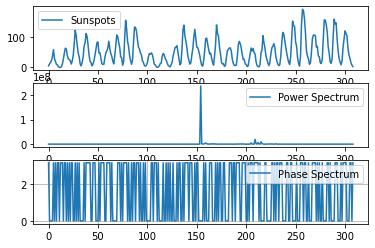

In [21]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift
 
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
 
transformed = fftshift(rfft(sunspots))
 
plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.legend()
plt.subplot(312)
plt.plot(transformed ** 2, label="Power Spectrum")
plt.legend()
plt.subplot(313)
plt.plot(np.angle(transformed), label="Phase Spectrum")
plt.grid(True)
plt.legend()
plt.show()
